## Feature scaling in the process of converting higher scaled numerical data to a lower scale data

#### There are 4 types of scaling methods
1. min-max scaling
    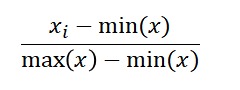
2. Decimal scaling or maximum absolute scaling
   ## Xi/Xmax
3. Standard scaling or Z-score normalization
    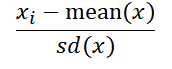
4. Robust scaling
    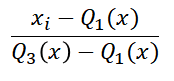
    
##### Robust scaling is the best method among the 4

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [25]:
url=r'https://raw.githubusercontent.com/anantdivanji/LearnDigital-/main/4th%20Sem/Data.xls'

In [54]:
data=pd.read_csv(url)
data

,Country,Age,Salary,Purchased
0,France,44,72000,No
1,Spain,27,48000,Yes
2,Germany,30,54000,No
3,Spain,38,61000,No
4,Germany,40,64000,Yes
5,France,35,58000,Yes
6,Spain,40,52000,No
7,France,48,79000,Yes
8,Germany,50,83000,No
9,France,37,67000,Yes


# Method 1- Decimal Scaling

In [4]:
data['Age'].max()

50

In [5]:
data['Age_scaled']=data['Age']/data['Age'].max()

In [6]:
data

,Country,Age,Salary,Purchased,Age_scaled
0,France,44,72000,No,0.88
1,Spain,27,48000,Yes,0.54
2,Germany,30,54000,No,0.60
3,Spain,38,61000,No,0.76
4,Germany,40,64000,Yes,0.80
5,France,35,58000,Yes,0.70
6,Spain,40,52000,No,0.80
7,France,48,79000,Yes,0.96
8,Germany,50,83000,No,1.00
9,France,37,67000,Yes,0.74


In [7]:
data['Salary_scaled']=data['Salary']/data['Salary'].max()
data

,Country,Age,Salary,Purchased,Age_scaled,Salary_scaled
0,France,44,72000,No,0.88,0.734694
1,Spain,27,48000,Yes,0.54,0.489796
2,Germany,30,54000,No,0.60,0.551020
3,Spain,38,61000,No,0.76,0.622449
4,Germany,40,64000,Yes,0.80,0.653061
5,France,35,58000,Yes,0.70,0.591837
6,Spain,40,52000,No,0.80,0.530612
7,France,48,79000,Yes,0.96,0.806122
8,Germany,50,83000,No,1.00,0.846939
9,France,37,67000,Yes,0.74,0.683673


In [14]:
from sklearn.preprocessing import MaxAbsScaler
Mas=MaxAbsScaler()
Mas

MaxAbsScaler()

In [15]:
data[['Age','Salary']]=Mas.fit_transform(data[['Age','Salary']])
data

,Country,Age,Salary,Purchased
0,France,0.88,0.734694,No
1,Spain,0.54,0.489796,Yes
2,Germany,0.60,0.551020,No
3,Spain,0.76,0.622449,No
4,Germany,0.80,0.653061,Yes
5,France,0.70,0.591837,Yes
6,Spain,0.80,0.530612,No
7,France,0.96,0.806122,Yes
8,Germany,1.00,0.846939,No
9,France,0.74,0.683673,Yes


# Method 2- MinMax Scaling

In [22]:
data['Age'].agg(['min','max'])

min    27
max    50
Name: Age, dtype: int64

In [23]:
data['Age_scaled']=(data['Age']-data['Age'].min())/(data['Age'].max()-data['Age'].min())
data

,Country,Age,Salary,Purchased,Age_scaled
0,France,44,72000,No,0.739130
1,Spain,27,48000,Yes,0.000000
2,Germany,30,54000,No,0.130435
3,Spain,38,61000,No,0.478261
4,Germany,40,64000,Yes,0.565217
5,France,35,58000,Yes,0.347826
6,Spain,40,52000,No,0.565217
7,France,48,79000,Yes,0.913043
8,Germany,50,83000,No,1.000000
9,France,37,67000,Yes,0.434783


In [24]:
data['Salary_scaled']=(data['Salary']-data['Salary'].min())/(data['Salary'].max()-data['Salary'].min())
data

,Country,Age,Salary,Purchased,Age_scaled,Salary_scaled
0,France,44,72000,No,0.739130,0.48
1,Spain,27,48000,Yes,0.000000,0.00
2,Germany,30,54000,No,0.130435,0.12
3,Spain,38,61000,No,0.478261,0.26
4,Germany,40,64000,Yes,0.565217,0.32
5,France,35,58000,Yes,0.347826,0.20
6,Spain,40,52000,No,0.565217,0.08
7,France,48,79000,Yes,0.913043,0.62
8,Germany,50,83000,No,1.000000,0.70
9,France,37,67000,Yes,0.434783,0.38


In [33]:
from sklearn.preprocessing import MinMaxScaler
MMs=MinMaxScaler()
MMs

MinMaxScaler()

In [34]:
data[['Age','Salary']]=MMs.fit_transform(data[['Age','Salary']])
data

,Country,Age,Salary,Purchased
0,France,0.739130,0.48,No
1,Spain,0.000000,0.00,Yes
2,Germany,0.130435,0.12,No
3,Spain,0.478261,0.26,No
4,Germany,0.565217,0.32,Yes
5,France,0.347826,0.20,Yes
6,Spain,0.565217,0.08,No
7,France,0.913043,0.62,Yes
8,Germany,1.000000,0.70,No
9,France,0.434783,0.38,Yes


# Method 3- Standard scaling

In [36]:
data['Age'].mean()

39.81818181818182

In [37]:
data['Age'].std()

7.534164609539426

In [38]:
data['Age_scaled']=(data['Age'] - data['Age'].mean()) / data['Age'].std()
data

,Country,Age,Salary,Purchased,Age_scaled
0,France,44,72000,No,0.555047
1,Spain,27,48000,Yes,-1.701341
2,Germany,30,54000,No,-1.303155
3,Spain,38,61000,No,-0.241325
4,Germany,40,64000,Yes,0.024132
5,France,35,58000,Yes,-0.639511
6,Spain,40,52000,No,0.024132
7,France,48,79000,Yes,1.085962
8,Germany,50,83000,No,1.351420
9,France,37,67000,Yes,-0.374054


In [39]:
data['Salary_scaled']=(data['Salary'] - data['Salary'].mean()) / data['Salary'].std()
data

,Country,Age,Salary,Purchased,Age_scaled,Salary_scaled
0,France,44,72000,No,0.555047,0.338126
1,Spain,27,48000,Yes,-1.701341,-1.255896
2,Germany,30,54000,No,-1.303155,-0.857390
3,Spain,38,61000,No,-0.241325,-0.392467
4,Germany,40,64000,Yes,0.024132,-0.193215
5,France,35,58000,Yes,-0.639511,-0.591720
6,Spain,40,52000,No,0.024132,-0.990226
7,France,48,79000,Yes,1.085962,0.803049
8,Germany,50,83000,No,1.351420,1.068719
9,France,37,67000,Yes,-0.374054,0.006038


In [40]:
from sklearn.preprocessing import StandardScaler
SS=StandardScaler()
SS

StandardScaler()

In [53]:
data[['Age','Salary']]=SS.fit_transform(data[['Age','Salary']])
data

,Country,Age,Salary,Purchased
0,France,0.582139,0.354629,No
1,Spain,-1.784381,-1.317195,Yes
2,Germany,-1.366760,-0.899239,No
3,Spain,-0.253104,-0.411623,No
4,Germany,0.025310,-0.202645,Yes
5,France,-0.670725,-0.620601,Yes
6,Spain,0.025310,-1.038557,No
7,France,1.138967,0.842245,Yes
8,Germany,1.417381,1.120882,No
9,France,-0.392311,0.006333,Yes


# Method 4- Robust Scaling

In [44]:
data.describe()

,Age,Salary
count,11.000000,11.000000
mean,39.818182,66909.090909
std,7.534165,15056.258137
min,27.000000,48000.000000
25%,36.000000,56000.000000
50%,40.000000,64000.000000
75%,46.000000,75500.000000
max,50.000000,98000.000000


In [48]:
data['Age_scaled']=(data['Age']-data['Age'].quantile(.25)) / (data['Age'].quantile(.75) - data['Age'].quantile(.25))
data

,Country,Age,Salary,Purchased,Age_scaled
0,France,44,72000,No,0.8
1,Spain,27,48000,Yes,-0.9
2,Germany,30,54000,No,-0.6
3,Spain,38,61000,No,0.2
4,Germany,40,64000,Yes,0.4
5,France,35,58000,Yes,-0.1
6,Spain,40,52000,No,0.4
7,France,48,79000,Yes,1.2
8,Germany,50,83000,No,1.4
9,France,37,67000,Yes,0.1


In [50]:
data['Salary_scaled']=(data['Salary']-data['Salary'].quantile(.25)) / (data['Salary'].quantile(.75) - data['Salary'].quantile(.25))
data

,Country,Age,Salary,Purchased,Age_scaled,Salary_scaled
0,France,44,72000,No,0.8,0.820513
1,Spain,27,48000,Yes,-0.9,-0.410256
2,Germany,30,54000,No,-0.6,-0.102564
3,Spain,38,61000,No,0.2,0.256410
4,Germany,40,64000,Yes,0.4,0.410256
5,France,35,58000,Yes,-0.1,0.102564
6,Spain,40,52000,No,0.4,-0.205128
7,France,48,79000,Yes,1.2,1.179487
8,Germany,50,83000,No,1.4,1.384615
9,France,37,67000,Yes,0.1,0.564103


In [51]:
from sklearn.preprocessing import RobustScaler
RS=RobustScaler()
RS

RobustScaler()

In [55]:
data[['Age','Salary']]=RS.fit_transform(data[['Age','Salary']])
data

,Country,Age,Salary,Purchased
0,France,0.4,0.410256,No
1,Spain,-1.3,-0.820513,Yes
2,Germany,-1.0,-0.512821,No
3,Spain,-0.2,-0.153846,No
4,Germany,0.0,0.000000,Yes
5,France,-0.5,-0.307692,Yes
6,Spain,0.0,-0.615385,No
7,France,0.8,0.769231,Yes
8,Germany,1.0,0.974359,No
9,France,-0.3,0.153846,Yes
